# ANN for regression, exercise project 1 - Diamonds

## Dependancies

In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [2]:
df = pd.read_csv("data/diamonds_optimized.csv")

In [3]:
df.head()

,carat,cut,color,clarity,price
0,0.41,3,5,4,1079
1,0.71,3,5,3,3101
2,1.01,3,2,2,4513
3,0.41,2,3,3,827
4,0.52,1,6,3,1701


In [4]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
price      0
dtype: int64

## Creating the regression model

In [5]:
# printing out the column names for easier copying for X/y
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'price'], dtype='object')

In [6]:
# define independent variable
X = df.drop("price", axis=1)

# define dependant variable
y = df['price']

In [7]:
# unfortunately the scikit-learn's train_test_split doesn't support validation
# set split in itself.
# if you want to split the test set into two for a validation set too, try this trick:

# first, train/test split => 70% for training, 30% for other purposes (temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# now, split the 30% for other purposes by 50% (resulting in 2 x 15%)
# so finally, we have:
# 70% for training
# 15% for testing
# 15% for validation
# => 70 + 15 +15 = 100%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [8]:
variable_amount = len(X.columns)

In [9]:
# just seeing how much data we have in each
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 1671
Test data amount: 359
Validation data amount: 358


### First Model

First, let's just try to stick to layers with a high node count.

In [34]:
# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.Dense(64, input_shape=(variable_amount,)),  # 1st layer with 64 neurons
        layers.Dense(128),  # 2nd layer with more neurons to learn complex patterns
        layers.Dense(64),  # 3rd layer reduces neuron count
        layers.Dense(1)  # Output layer for regression
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\Startklar\Documents\Study\Finnilandi\DeepLearning\DPierdiluca_DL-Repo\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.fit(x=X_train, y=y_train, epochs=250, validation_data=(X_val, y_val))

Epoch 1/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 90067024.0000 - val_loss: 77160360.0000
Epoch 2/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71969296.0000 - val_loss: 33449378.0000
Epoch 3/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29681018.0000 - val_loss: 29325878.0000
Epoch 4/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24712226.0000 - val_loss: 24806208.0000
Epoch 5/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21164420.0000 - val_loss: 19664674.0000
Epoch 6/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15631959.0000 - val_loss: 14120710.0000
Epoch 7/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11209766.0000 - val_loss: 8793757.0000
Epoch 8/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7324706.5000 - val_loss: 5623566.5000
Epoch 9/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4788210.5000 - val_loss: 4046976.2500
Epoch 10/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3921072.7500 - val_loss: 3321719.7500
Epoch 11/250
53/

<Axes: >

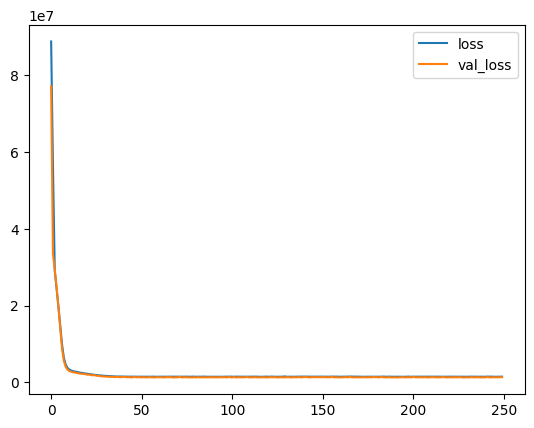

In [36]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

Seems to adjust quickly.

In [37]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
1341454.625

Train data evaluation:
1434542.625


These numbers could be better.

In [38]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Test True Y,Model Predictions
0,6338,7049.229004
1,9799,9074.833008
2,8353,7747.383301
3,11147,10703.323242
4,1259,3548.684570
...,...,...
354,3780,4129.642090
355,10020,8785.850586
356,10416,11977.542969
357,8811,7780.999512


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

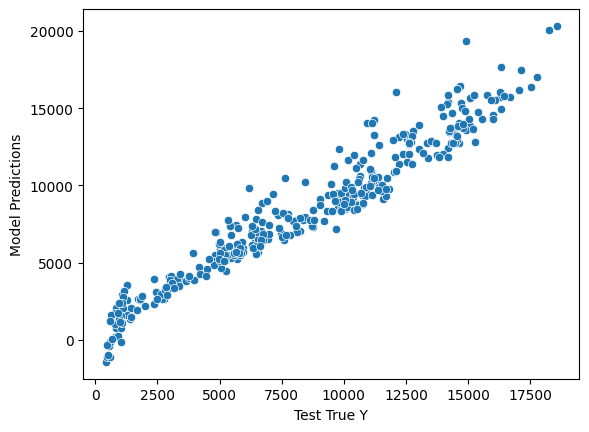

In [39]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

At least the scatterplot looks a bit more condensed than our previous attempts.

In [40]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
913.3 $

MSE
1341454.53 $^2

RMSE:
1158.21 $

R-squared:
0.94

Explained variance score:
0.94


These are pretty good numbers.

C:\Users\Startklar\AppData\Local\Temp\ipykernel_20512\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


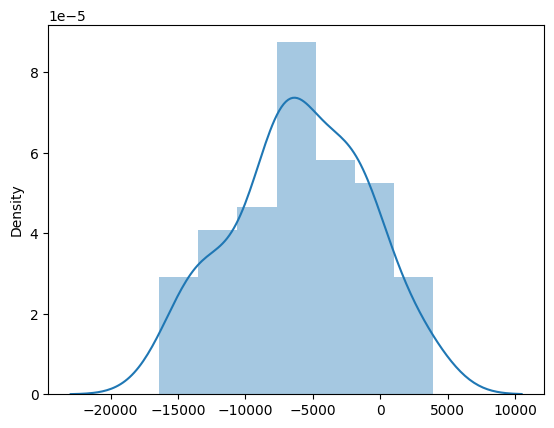

In [41]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

This looks like a pretty normal distribution. The model seems to be very prone to overpredicting. The undersampling we did seems to have destroyed the predictions.

In [42]:
df.head()

,carat,cut,color,clarity,price
0,0.41,3,5,4,1079
1,0.71,3,5,3,3101
2,1.01,3,2,2,4513
3,0.41,2,3,3,827
4,0.52,1,6,3,1701


In [43]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
            'carat':    0.25,
            'cut' :      3,
            'color':      3,
            'clarity' :   4
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

To test how accurate the prediction is, I also put these stats into various online calculators:

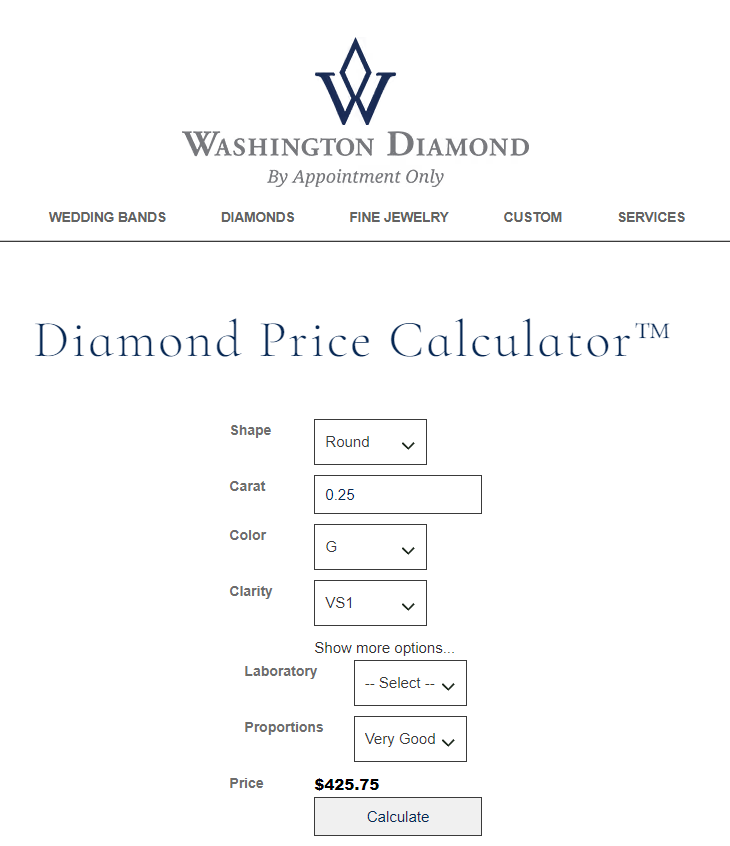

https://www.washingtondiamond.com/diamond-price-calculator

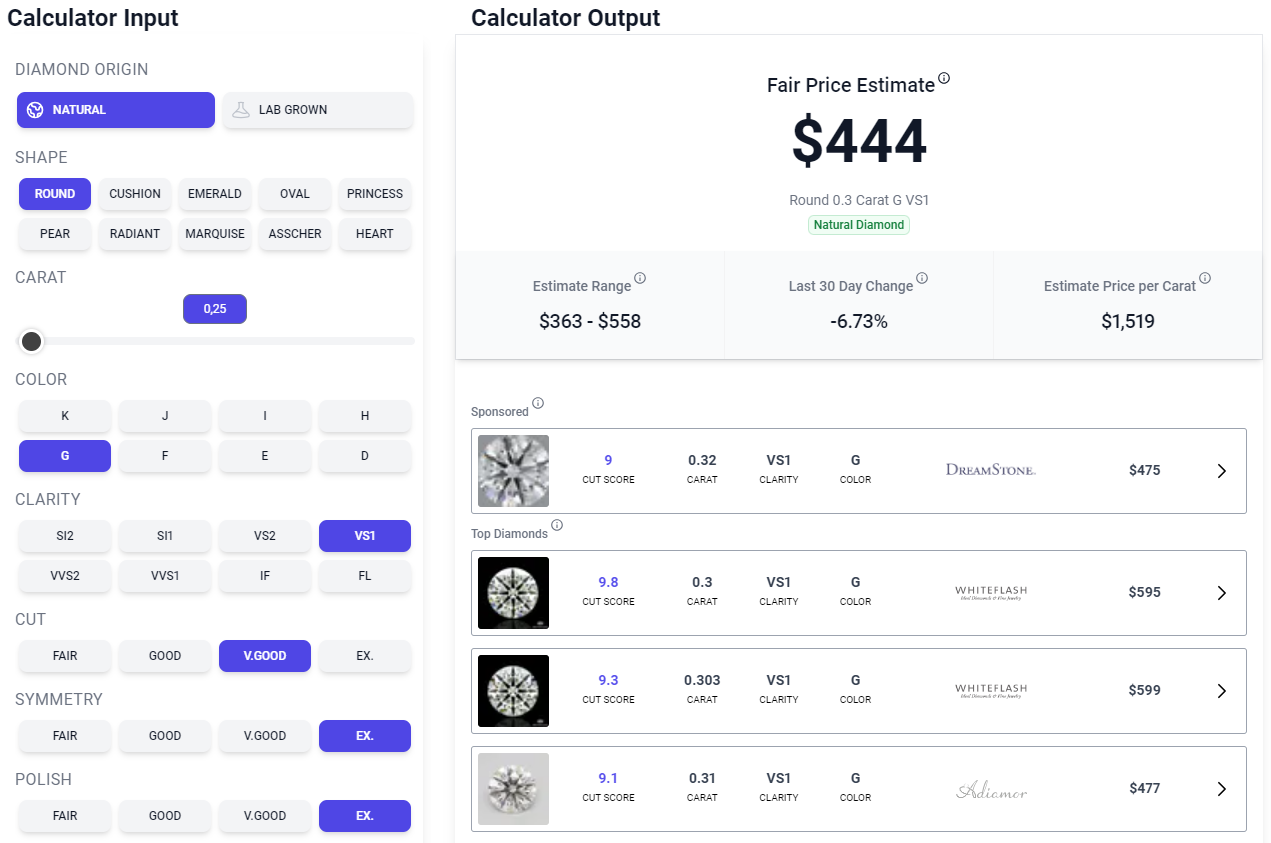

https://www.stonealgo.com/diamond-price-calculator/calc?a=1&b=0.3&c=5&d=4&e=3&f=4&g=4&h=5&i=0

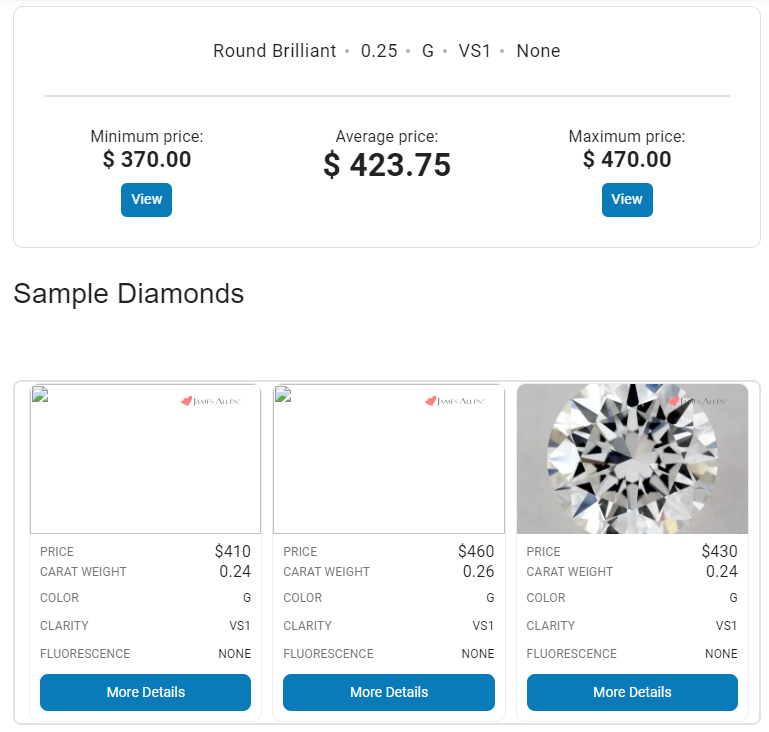

https://www.diamonds.pro/education/diamond-price-calculator/

I have also used these online tools to test if some prices of the diamonds from the dataset could be guessed correctly.<br>
And in many instances the online tools were able to guess very good, being only around 10% off of the actual prices. Which means these tools CAN be very accurate.

Which could suggest that the actual price of the sample diamond for the estimation would be around 430$.

In [44]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this diamond:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Estimated price for this diamond:
95.89 $
----------------


A bit too low.

In [45]:
len(y_test)

359

### Second Model

Let's try the model that we previously deemed as the best.

In [48]:
# Define Sequential neural network model
# modify the input shape to match your training column count
# remember, one of the columns is removed from training columns
# to be the target value. so if your data originally had 10 columns
# the input shape is 9 ... (10 - 1 => 9)
# the input layer itself can have a different number of nodes
# Tip: have at least the same number of nodes as in the input shape
# output layer in regression is always 1 node without activation function
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 1st layer with 64 neurons
        layers.Dropout(0.1),  # Add dropout to avoid overfitting
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 2nd layer with more neurons to learn complex patterns
        layers.Dropout(0.1),  # Dropout again
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(l2=0.1)),  # 3rd layer reduces neuron count
        layers.Dense(1)  # Output layer for regression
    ]
)

# select the optimizer and loss function
# you can try rmsprop also as optimizer, or stochastic gradient descent
model.compile(optimizer='adam', loss='mse')

# common tips on how to change neural network structure if your metrics are not good:

# make wider (or narrower) layers (for example, 64 or 128 nodes)
# make a longer or shorter network (add or remove layers)
# use Dropout -layers (e.g. layers.Dropout(0.1))

# remember: there's no process or mathematical formula
# in order to figure out the optimal neural network structure
# it's mostly all about trial and error => EXPERIMENTATION!

# remember to have enough "decision-space" for your data!
# it's highly unlikely a dataset with 20 different variables is going
# to work well with only 8 nodes in each layer etc.

# print out the summary of your model
model.summary()

c:\Users\Startklar\Documents\Study\Finnilandi\DeepLearning\DPierdiluca_DL-Repo\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,977 (66.32 KB)

 Trainable params: 16,969 (66.29 KB)

 Non-trainable params: 8 (32.00 B)

In [49]:
model.fit(x=X_train, y=y_train, epochs=250, validation_data=(X_val, y_val))

Epoch 1/250


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 91870440.0000 - val_loss: 84824920.0000
Epoch 2/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 92665776.0000 - val_loss: 72567416.0000
Epoch 3/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68759784.0000 - val_loss: 23567920.0000
Epoch 4/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17837596.0000 - val_loss: 9021885.0000
Epoch 5/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9701159.0000 - val_loss: 7265511.0000
Epoch 6/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7966581.0000 - val_loss: 5966986.5000
Epoch 7/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6618860.5000 - val_loss: 5025516.5000
Epoch 8/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5427747.5000 - val_loss: 4401560.0000
Epoch 9/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5161900.0000 - val_loss: 3803709.5000
Epoch 10/250
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4330212.0000 - val_loss: 3412531.7500
Epoch 11/250
53/53 ━━━━━━━━━━━━━━

<Axes: >

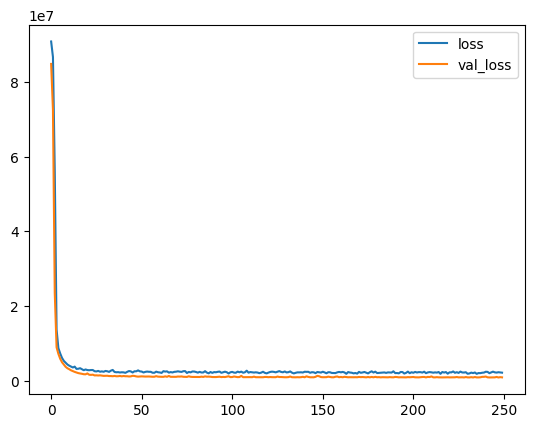

In [50]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

Doesn't seem to dissimiliar from the first model.

In [51]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
1027123.8125

Train data evaluation:
1109234.625


Kind of the same.

In [52]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,Test True Y,Model Predictions
0,6338,6567.707520
1,9799,9433.597656
2,8353,8332.173828
3,11147,10655.994141
4,1259,1622.259521
...,...,...
354,3780,4297.580566
355,10020,9033.700195
356,10416,11686.945312
357,8811,8260.986328


The guesses seem to be very close sometimes.

<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

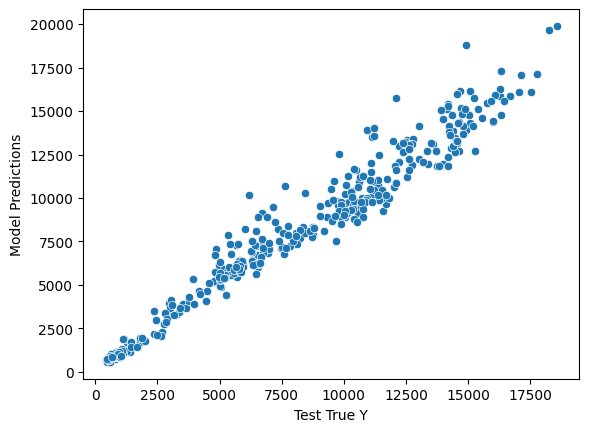

In [53]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

Same here.

In [54]:
 # MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
741.37 $

MSE
1026893.52 $^2

RMSE:
1013.36 $

R-squared:
0.95

Explained variance score:
0.95


A bit better?

C:\Users\Startklar\AppData\Local\Temp\ipykernel_20512\3124900743.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


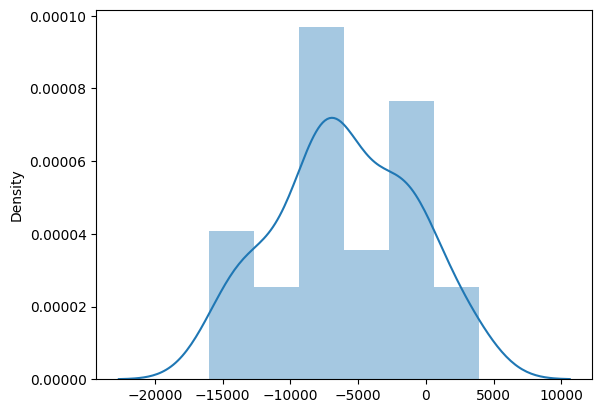

In [55]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

same problem

In [56]:
df.head()

,carat,cut,color,clarity,price
0,0.41,3,5,4,1079
1,0.71,3,5,3,3101
2,1.01,3,2,2,4513
3,0.41,2,3,3,827
4,0.52,1,6,3,1701


In [59]:
# let's try with some new imaginary data
# this example uses the student performance index score dataset
# modify this as needed regarding your own dataset
tester_row = {
            'carat':    0.25,
            'cut' :      3,
            'color':      3,
            'clarity' :   4
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [60]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated price for this diamond:")
print(f"{round(float(result[0]), 2)} $")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Estimated price for this diamond:
740.65 $
----------------


Too high.

In [61]:
len(y_test)

359

## Conclusions

Ok, seems the undersampling did not work as I'd hoped it to. Let's go back to the drawing board and optimize the dataset without undersampling.